### Importing the needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import datetime
import seaborn as sns

### Fetching the data files

In [2]:
shops = pd.read_csv("data/shops.csv")
items = pd.read_csv("data/items.csv")
item_categories = pd.read_csv("data/item_categories.csv")
test = pd.read_csv("data/test.csv")
sales_train = pd.read_csv("data/sales_train.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

### Printing the info and few data from each data table

In [3]:
print(shops.info())
shops.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [4]:
print(items.info())
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
print(item_categories.info())
item_categories.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
print(sales_train.info())
sales_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
print(sample_submission.info())
sample_submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
ID                214200 non-null int64
item_cnt_month    214200 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB
None


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


### Converting `sales_train['date']` to `datetime` format

In [9]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
print(sales_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None


In [10]:
sales_train['item_cnt_day'].nlargest(50).values

array([2169., 1000.,  669.,  637.,  624.,  539.,  533.,  512.,  508.,
        504.,  502.,  501.,  500.,  500.,  480.,  412.,  405.,  401.,
        401.,  343.,  325.,  313.,  313.,  300.,  299.,  288.,  264.,
        255.,  251.,  242.,  240.,  231.,  230.,  222.,  217.,  207.,
        205.,  205.,  200.,  195.,  194.,  187.,  179.,  171.,  171.,
        171.,  168.,  168.,  167.,  164.])

### `shop_id` histogram in `sales_train`

In [73]:
layout = go.Layout(
    title=go.layout.Title(
        text='total entries for each `shop_id` in training set',
        xref='paper',
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='shop_id',
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='entry counts',
        )
    ),
    
    
)

fig = go.Figure(data=[go.Bar(y=sales_train['shop_id'].value_counts(normalize=False), x=sales_train['shop_id'].unique())], layout=layout)
fig.show()

In [12]:
layout = go.Layout(
    title='`item_id` histogram'
)
fig = go.Figure(data=[go.Bar(y=sales_train['item_id'].value_counts(normalize=False))], layout=layout)
fig.show()

### Plotting time periods for `data_blocks_num` in `sales_train`

In [32]:
fig = go.Figure()
for date_block in sales_train['date_block_num'].unique():
    data = sales_train[sales_train['date_block_num'] == date_block]['date']
    fig.add_trace(go.Scatter(x=[min(data), max(data)], y=[date_block, date_block],
            mode='lines+markers',
            name='date_block: '+ str(date_block)))
fig.update_layout(legend_orientation="h", width=1000, height= 800, title="date block time periods")
fig.show()

### Group the `sales_train` df by `shop_id` and `date_block_num`
### Plotting `item_cnt_day` vs `date_block_num` for each `shop_id`

In [28]:
grouped_sales_train = pd.DataFrame(sales_train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())

fig = go.Figure()
for shop_id in grouped_sales_train['shop_id'].unique():
        data = grouped_sales_train[grouped_sales_train['shop_id'] == shop_id]
        fig.add_trace(go.Scatter(x=data['date_block_num'], y=data['item_cnt_day'],
                    mode='lines+markers',
                    name='shop_id: '+ str(shop_id)))
fig.update_layout(legend_orientation="h", width=1600, height=1000, title="Plotting total 'item_cnt_day' amount across a 'date_block_num' for each 'shop_id'")
fig.show()

We can see a peak in the sales count at datablocks `11` and `23` which correspond to `December` month of `2013` and `2014` respectively

### Joining `sales_train` with `items`

In [15]:
train = sales_train.set_index('item_id').join(items.set_index('item_id')).drop('item_name', axis=1).reset_index()
train.head()

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,0,2014-09-01,20,54,58.0,1.0,40
1,1,2014-04-04,15,55,4490.0,1.0,76
2,1,2014-04-02,15,55,4490.0,1.0,76
3,1,2014-07-06,18,55,4490.0,1.0,76
4,1,2014-08-04,19,55,4490.0,1.0,76


### Plotting `item_cnt_day` vs `date_block_num` for each `item_category_id`

In [31]:
grouped_sales_train = pd.DataFrame(train.groupby(['item_category_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())
fig = go.Figure()
for item_cat in grouped_sales_train['item_category_id'].unique():
        data = grouped_sales_train[grouped_sales_train['item_category_id'] == item_cat]
        fig.add_trace(go.Scatter(x=data['date_block_num'], y=data['item_cnt_day'],
                    mode='lines+markers',
                    name='item cat: '+ str(item_cat)))
fig.update_layout(legend_orientation="h", width=1600, height=1000, title="Plotting total 'item_cnt_day' amount across a 'date_block_num' for each 'item_category_id'")
fig.show()

### Checking for outliers in `sales_train`

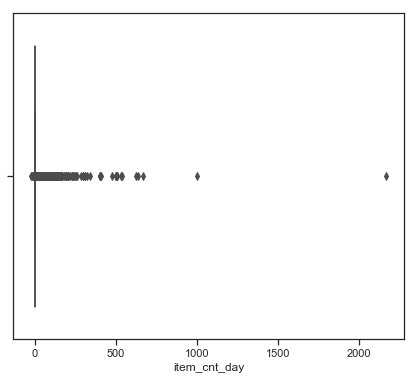

In [17]:
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x=sales_train['item_cnt_day'])